# TAREA 5. Regresión Lineal
### Equipo 11. 
- Iñaki Fernández Fiscal
- Mauricio Vázquez Moran
- Guillermo Arredondo Renero

In [123]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.preprocessing import StandardScaler 
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt

In [226]:
path_actual = os.getcwd()
doc_path = path_actual[:path_actual.find('/I')+1]
data_path = os.path.join(doc_path, 'GitHub/machine-learning-2023/supervisado/regresion_lineal/pesos_y_alturas.csv')
data = pd.read_csv(data_path)
data

,Sexo,Altura,Peso
0,Masculino,1.875714,109.721075
1,Masculino,1.747060,73.622792
2,Masculino,1.882397,96.497629
3,Masculino,1.821967,99.809586
4,Masculino,1.774998,93.598695
...,...,...,...
9995,Femenino,1.680785,62.041210
9996,Femenino,1.703506,77.504378
9997,Femenino,1.622247,58.275424
9998,Femenino,1.753470,74.322226


In [227]:
data_norm = (data[['Altura', 'Peso']]-data[['Altura', 'Peso']].mean())/data[['Altura', 'Peso']].std()
data_norm['Sexo'] = data.apply(lambda x: 1 if x['Sexo'] == 'Masculino' else 0, axis=1)
data_norm['Aux'] = np.ones(len(data_norm))
data['Sexo'] = data.apply(lambda x: 1 if x['Sexo'] == 'Masculino' else 0, axis=1)
data['Aux'] = np.ones(len(data))
data_norm

,Altura,Peso,Sexo,Aux
0,1.943964,2.505672,1,1.0
1,0.627505,0.027099,1,1.0
2,2.012343,1.597726,1,1.0
3,1.393991,1.825131,1,1.0
4,0.913375,1.398680,1,1.0
...,...,...,...,...
9995,-0.050658,-0.768113,0,1.0
9996,0.181830,0.293616,0,1.0
9997,-0.649655,-1.026678,0,1.0
9998,0.693090,0.075124,0,1.0


In [315]:
def regresion_SGD(X, y, etha,T = 150):
    n=len(X)
    theta= np.zeros(X.shape[1]).reshape(-1,1)
    thetas=[]
    y = y.reshape(-1,1)
    i_s=[]
    for t in trange(T):
        i = np.random.randint(0, n)
        while ( i in i_s):
            i = np.random.randint(0, n)
        i_s.append(i)
        x_i = X[i].reshape(-1,1)
        y_i = y[i].reshape(-1,1)
        
        # theta.T*x_i tiene que ser (1x3)x(3x1)
        theta_new = theta - etha*np.dot(x_i,(np.dot(theta.T,x_i)-y_i))
        
        thetas.append(theta_new)
        theta=theta_new

    return thetas

In [292]:
def J(X, y, theta):
    suma = 0
    n = len(X)
    for i in range(n):
        x_i = X[i].reshape(-1,1)
        y_i = y[i].reshape(-1,1)
        suma += (np.dot(theta.T,x_i)-y_i)**2
    res=(1/(2*n))*suma

    return res

In [293]:
def regresion_SVMGD(X, y,etha):
    n=len(X)
    theta= np.zeros(X.shape[1]).reshape(-1,1)
    thetas=[]
    y = y.reshape(-1,1)
    tol=1e-4
    bandera=1
    t = 0
    while(bandera>=tol):
        aux_theta = 0
        aux_0 = 0
        for i in range(n):
            x_i = X[i].reshape(-1,1)
            y_i=y[i].reshape(-1,1)
            aux_theta += np.dot((np.dot(theta.T,x_i)-y_i),x_i)

        theta_new = theta - etha*((1/n)*aux_theta)
        thetas.append(theta_new)
        t = t+1
        bandera=abs(J(X, y, theta_new)-J(X, y, theta))
        theta = theta_new
    return thetas

In [316]:
X = np.array(data[['Altura', 'Sexo', 'Aux']])
y = np.array(data['Peso'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
thetas = regresion_SGD(X_train, y_train, 0.01)

  0%|          | 0/150 [00:00<?, ?it/s]

In [317]:
thetas

[array([[1.68154214],
        [0.95036866],
        [0.95036866]]),
 array([[2.51533459],
        [0.95036866],
        [1.48040625]]),
 array([[3.41651244],
        [0.95036866],
        [2.02930506]]),
 array([[4.32418826],
        [0.95036866],
        [2.58418386]]),
 array([[5.59157762],
        [1.66788378],
        [3.30169898]]),
 array([[6.20318344],
        [1.66788378],
        [3.68802702]]),
 array([[7.36910539],
        [2.3509745 ],
        [4.37111774]]),
 array([[8.74733794],
        [3.11180338],
        [5.13194662]]),
 array([[9.50671746],
        [3.11180338],
        [5.60057868]]),
 array([[10.44090452],
        [ 3.64424281],
        [ 6.13301812]]),
 array([[11.11474472],
        [ 4.06255973],
        [ 6.55133503]]),
 array([[11.54911745],
        [ 4.06255973],
        [ 6.83613272]]),
 array([[12.48534593],
        [ 4.06255973],
        [ 7.38154035]]),
 array([[13.21470904],
        [ 4.51273535],
        [ 7.83171597]]),
 array([[14.20192589],
        [ 

In [233]:
def coeficiente_determinacion(thetas, x, y):
    prom=np.mean(y)
    ss_tot=[]
    ss_res=[]
    for i in range(len(x)):
        pp=np.dot(thetas,x[i])
        ss_tot.append((pp-y[i][0])**2)
        ss_res.append((prom-y[i][0])**2)    
    return 1-(sum(ss_res)/sum(ss_tot))

In [318]:
thetas[-1]

array([[29.97377201],
       [12.6200234 ],
       [17.32595706]])

In [254]:
def predict(X, medias, desviaciones, thetas):
    betas = [thetas[2], thetas[0], thetas[1]]
    df = data['Altura'] 
    y = betas[0] - (betas[1]*df.mean()/df.std() + betas[2]*df.mean()/df.std()) + (betas[1]/df.std()*X[0] + betas[2]/df.std()*X[1])
    return y

In [255]:
X_test_df = pd.DataFrame(X_test, columns=['Altura', 'Sexo', 'Aux'])

In [256]:
X_test_df['Altura'] = (X_test_df['Altura']*desviaciones[0])+medias[0]
X_test_df

,Altura,Sexo,Aux
0,1.856236,0.0,1.0
1,1.856589,1.0,1.0
2,1.850554,1.0,1.0
3,1.864284,1.0,1.0
4,1.852155,1.0,1.0
...,...,...,...
1995,1.848942,0.0,1.0
1996,1.836489,0.0,1.0
1997,1.840106,0.0,1.0
1998,1.852218,1.0,1.0


In [223]:
X_test_df.iloc[0, :2]

Altura    1.744656
Sexo      0.000000
Name: 0, dtype: float64

In [224]:
predict(X_test_df.iloc[10,:2], medias, desviaciones, thetas[-1])

array([-1.0020209])

In [319]:
def predict(X, thetas):
    y = thetas[2] + thetas[0]*X[0] + thetas[1]*X[1]
    return y

In [320]:
X_test.shape

(2000, 3)

In [321]:
predict(X_test[1500][:2], thetas[-1])

array([68.142928])

In [322]:
y_test[1500]

73.75673201

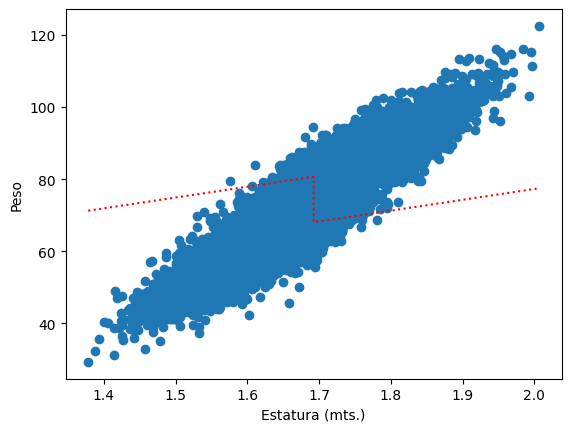

In [323]:
fig, ax = plt.subplots()
ax.scatter(data['Altura'],data['Peso'])
plt.ylabel('Peso')
plt.xlabel('Estatura (mts.)')
h=[]
h2=np.linspace(min(data['Altura']), max(data['Altura']), len(data['Altura']))
s = data['Sexo']
for i in range(len(data['Altura'])):
    h.append((thetas[-1][2] +thetas[-1][1]*s[i])+thetas[-1][0]*h2[i])
ax.plot(h2,h,'r:')